In [1]:
!pip install PyPortfolioOpt
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import yfinance as yf
import matplotlib.pyplot as plt
from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import plotting
import numpy as np
import pandas as pd

In [3]:
stock_data = yf.download("XOM AAPL TSLA PFE PG VZ JPM AMZN BA GE", start="2020-6-01", end="2021-1-19")

[*********************100%***********************]  10 of 10 completed


In [4]:
stock_data

Adj Close                                                 \
                  AAPL        AMZN          BA         GE         JPM   
Date                                                                    
2020-06-01   79.359711  123.552002  151.389999  53.578812   92.311363   
2020-06-02   79.727097  123.620499  153.309998  55.877308   92.620316   
2020-06-03   80.165985  123.919998  173.160004  58.334328   97.619728   
2020-06-04   79.475601  123.029999  184.300003  61.346146   99.651337   
2020-06-05   81.739136  124.150002  205.429993  62.455769  104.135826   
...                ...         ...         ...        ...         ...   
2021-01-11  127.661469  155.710495  206.789993  91.121132  132.664291   
2021-01-12  127.483307  156.041504  208.410004  93.747322  134.749619   
2021-01-13  129.551926  158.294495  207.210007  92.076103  134.874527   
2021-01-14  127.592178  156.373505  209.910004  92.792343  135.662537   
2021-01-15  125.840271  155.212494  204.320007  90.166138  133.231262   

                                                                     ...  \
                  PFE          PG        TSLA         VZ        XOM  ...   
Date                                                                 ...   
2020-06-01  31.001890  111.073181   59.873333  50.337399  40.478626  ...   
2020-06-02  31.613876  111.840515   58.770668  50.896904  41.379509  ...   
2020-06-03  31.613876  112.285759   58.863998  51.284950  43.067581  ...   
2020-06-04  31.482737  109.936409   57.625332  51.636898  42.945126  ...   
2020-06-05  31.465258  112.096291   59.043999  52.106159  46.426220  ...   
...               ...         ...         ...        ...        ...  ...   
2021-01-11  35.506229  132.141693  270.396667  53.561401  42.784565  ...   
2021-01-12  34.951595  131.374832  283.146667  53.374973  43.734524  ...   
2021-01-13  34.650776  131.576096  284.803345  53.188545  44.227768  ...   
2021-01-14  34.547367  130.176575  281.666656  53.169899  45.954136  ...   
2021-01-15  34.500362  129.198822  275.386658  53.486835  43.743652  ...   

               Volume                                                    \
                 AAPL      AMZN        BA        GE       JPM       PFE   
Date                                                                      
2020-06-01   80791200  58578000  27127300   9397338  15176800  76884979   
2020-06-02   87642800  50598000  24780500  14196925  21195000  42690900   
2020-06-03  104491200  53420000  66486400  15352438  25941100  38751996   
2020-06-04   87560400  58974000  67155600  15649238  26784700  27013388   
2020-06-05  137250400  66128000  99846000  20976450  42231000  36705655   
...               ...       ...       ...       ...       ...       ...   
2021-01-11  100384500  73668000  16770300   8406700  15937900  47286900   
2021-01-12   91951100  70292000  12836200  11429913  18033500  47831100   
2021-01-13   88636800  66424000   8570500   6714200  14816800  31027900   
2021-01-14   90221800  61418000  12446800   7401188  18565600  30272000   
2021-01-15  111598500  84880000  11103300   9201188  27881000  34287800   

                                                    
                 PG       TSLA        VZ       XOM  
Date                                                
2020-06-01  5105600  224092500  18156100  19031000  
2020-06-02  6327900  203484000  17300400  22319000  
2020-06-03  6171000  119242500  16086700  23418000  
2020-06-04  6895800  133315500  16147300  18731400  
2020-06-05  7337800  117178500  17105600  41328900  
...             ...        ...       ...       ...  
2021-01-11  7239900  177904800  15688000  38246200  
2021-01-12  6333500  138812100  22699300  36915100  
2021-01-13  6078800   99937500  16985400  29000300  
2021-01-14  6172800   93798900  18341100  35474800  
2021-01-15  7757600  116332800  15785300  42411300  

[160 rows x 60 columns]

In [5]:
stock_data = stock_data["Adj Close"]
stock_data

,AAPL,AMZN,BA,GE,JPM,PFE,PG,TSLA,VZ,XOM
Date,,,,,,,,,,
2020-06-01,79.359711,123.552002,151.389999,53.578812,92.311363,31.001890,111.073181,59.873333,50.337399,40.478626
2020-06-02,79.727097,123.620499,153.309998,55.877308,92.620316,31.613876,111.840515,58.770668,50.896904,41.379509
2020-06-03,80.165985,123.919998,173.160004,58.334328,97.619728,31.613876,112.285759,58.863998,51.284950,43.067581
2020-06-04,79.475601,123.029999,184.300003,61.346146,99.651337,31.482737,109.936409,57.625332,51.636898,42.945126
2020-06-05,81.739136,124.150002,205.429993,62.455769,104.135826,31.465258,112.096291,59.043999,52.106159,46.426220
...,...,...,...,...,...,...,...,...,...,...
2021-01-11,127.661469,155.710495,206.789993,91.121132,132.664291,35.506229,132.141693,270.396667,53.561401,42.784565
2021-01-12,127.483307,156.041504,208.410004,93.747322,134.749619,34.951595,131.374832,283.146667,53.374973,43.734524
2021-01-13,129.551926,158.294495,207.210007,92.076103,134.874527,34.650776,131.576096,284.803345,53.188545,44.227768


In [6]:
stock_returns = stock_data.pct_change()[1:]

In [7]:
stock_returns

,AAPL,AMZN,BA,GE,JPM,PFE,PG,TSLA,VZ,XOM
Date,,,,,,,,,,
2020-06-02,0.004629,0.000554,0.012682,0.042899,0.003347,0.019740,0.006908,-0.018417,0.011115,0.022256
2020-06-03,0.005505,0.002423,0.129476,0.043972,0.053977,0.000000,0.003981,0.001588,0.007624,0.040795
2020-06-04,-0.008612,-0.007182,0.064334,0.051630,0.020811,-0.004148,-0.020923,-0.021043,0.006863,-0.002843
2020-06-05,0.028481,0.009103,0.114650,0.018088,0.045002,-0.000555,0.019647,0.024619,0.009088,0.081059
2020-06-08,0.005913,0.016536,0.122037,0.073604,0.019959,0.016671,0.006085,0.072556,0.006062,0.031273
...,...,...,...,...,...,...,...,...,...,...
2021-01-11,-0.023249,-0.021519,-0.014817,0.009700,0.014925,0.017237,-0.006773,-0.078214,-0.005882,0.030356
2021-01-12,-0.001396,0.002126,0.007834,0.028821,0.015719,-0.015621,-0.005803,0.047153,-0.003481,0.022203
2021-01-13,0.016227,0.014438,-0.005758,-0.017827,0.000927,-0.008607,0.001532,0.005851,-0.003493,0.011278


In [8]:
mu2 = expected_returns.mean_historical_return(stock_data)
print(mu2)
type(mu2)

AAPL     1.076487
AMZN     0.435580
BA       0.608335
GE       1.281753
JPM      0.788777
PFE      0.184666
PG       0.270715
TSLA    10.228765
VZ       0.100961
XOM      0.130822
dtype: float64


pandas.core.series.Series

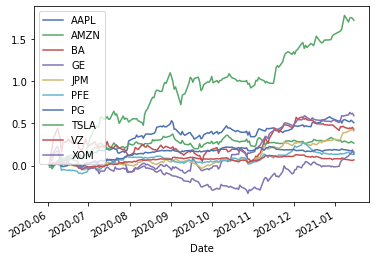

In [9]:
stock_data.pct_change()[1:].cumsum().plot()

In [10]:
cov_matrix2 = risk_models.sample_cov(stock_data)
print(cov_matrix2)
type(cov_matrix2)

          AAPL      AMZN        BA        GE       JPM       PFE        PG  \
AAPL  0.147671  0.094378  0.052788 -0.009792  0.012690  0.013407  0.023545   
AMZN  0.094378  0.121299  0.013376 -0.023544 -0.005438  0.004002  0.021174   
BA    0.052788  0.013376  0.408076  0.217029  0.158178  0.068216  0.016040   
GE   -0.009792 -0.023544  0.217029  0.222102  0.110155  0.047877  0.008081   
JPM   0.012690 -0.005438  0.158178  0.110155  0.133257  0.038035  0.005963   
PFE   0.013407  0.004002  0.068216  0.047877  0.038035  0.076412  0.009571   
PG    0.023545  0.021174  0.016040  0.008081  0.005963  0.009571  0.023273   
TSLA  0.127038  0.121082  0.076189  0.007468  0.027109  0.032978  0.035955   
VZ    0.009301  0.002916  0.042186  0.029334  0.024448  0.014078  0.010119   
XOM   0.016602 -0.009130  0.189398  0.134659  0.118292  0.040456  0.004843   

          TSLA        VZ       XOM  
AAPL  0.127038  0.009301  0.016602  
AMZN  0.121082  0.002916 -0.009130  
BA    0.076189  0.042186  0.18

pandas.core.frame.DataFrame

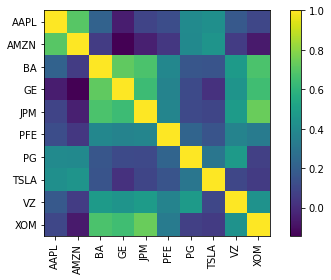

In [11]:
plotting.plot_covariance(cov_matrix2, plot_correlation=True);

In [12]:
ef = EfficientFrontier(mu2, cov_matrix2)
ef.max_sharpe()

OrderedDict([('AAPL', 0.0),
             ('AMZN', 0.0),
             ('BA', 0.0),
             ('GE', 0.230557801391219),
             ('JPM', 0.0),
             ('PFE', 0.0),
             ('PG', 0.0),
             ('TSLA', 0.7694421986087812),
             ('VZ', 0.0),
             ('XOM', 0.0)])

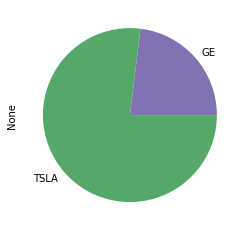

In [13]:
weights = ef.clean_weights()
pd.Series(weights).plot.pie()

In [14]:
ef.portfolio_performance(verbose=True)

Expected annual return: 816.6%
Annual volatility: 60.6%
Sharpe Ratio: 13.43


(8.165961123401452, 0.6063771629516226, 13.433819116389358)

In [15]:
#As you narrow your weight constraint, what happens to the postfolio's Expected Return, Standard Deviation, and Sharpe Ratio?
ef = EfficientFrontier(mu2, cov_matrix2, weight_bounds=(0, 0.2))
ef.max_sharpe()

OrderedDict([('AAPL', 0.1047954081945066),
             ('AMZN', 0.0),
             ('BA', 0.0),
             ('GE', 0.1485901756730076),
             ('JPM', 0.0714920513642497),
             ('PFE', 0.0751223647682362),
             ('PG', 0.2),
             ('TSLA', 0.1999999999999999),
             ('VZ', 0.2),
             ('XOM', 0.0)])

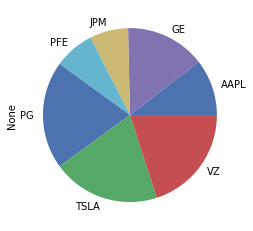

In [16]:
weights = ef.clean_weights()
pd.Series(weights).plot.pie()

In [17]:
ef.portfolio_performance(verbose=True)

Expected annual return: 249.4%
Annual volatility: 23.3%
Sharpe Ratio: 10.61


(2.493618577500575, 0.2332045307248989, 10.607077700469695)

In [18]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices


latest_prices = get_latest_prices(stock_data)

da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=100000)
allocation, leftover = da.lp_portfolio()
print("Discrete allocation:", allocation)
print("Funds remaining: ${:.2f}".format(leftover))

Discrete allocation: {'AAPL': 83, 'GE': 165, 'JPM': 53, 'PFE': 218, 'PG': 155, 'TSLA': 73, 'VZ': 373}
Funds remaining: $15.88
